In [1]:
import os
import glob
from typing import *
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image, display, clear_output
import numpy as np
%matplotlib nbagg
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")

import helper
#from helper import *

try:
    from plotting import make_vae_plots
except Exception as ex:
    print(f"If using Colab, you may need to upload `plotting.py`. \
          \nIn the left pannel, click `Files > upload to session storage` and select the file `plotting.py` from your computer \
          \n---------------------------------------------")
    print(ex)

If using Colab, you may need to upload `plotting.py`.           
In the left pannel, click `Files > upload to session storage` and select the file `plotting.py` from your computer           
---------------------------------------------
No module named 'plotting'


In [2]:
import math 
import torch
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
from torch import nn, Tensor
from torch.nn.functional import softplus
from torch.distributions import Distribution

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if torch.cuda.is_available():
        return x.cuda()
    return x

def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if torch.cuda.is_available():
        return x.cpu().data.numpy()
    return x.data.numpy()

### Loading the images in a dataloader

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
drive_path = 'drive/My Drive/UNI stuff/Deep Learning/Final Project/set5/'
training_path = drive_path + "training/"
test_path = drive_path + "testing/"

In [6]:
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

training_dataset = datasets.ImageFolder(training_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

In [7]:
training_dataset

Dataset ImageFolder
    Number of datapoints: 391
    Root location: drive/My Drive/UNI stuff/Deep Learning/Final Project/set5/training/
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [8]:
dataloader = torch.utils.data.DataLoader(training_dataset, batch_size=32, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [9]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

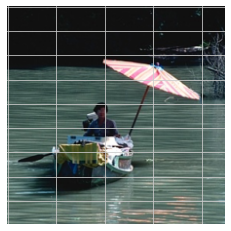

In [10]:
# Run this to test your data loader
images, labels = next(iter(dataloader))

imshow(images[0], normalize=False)